In [1]:
# https://www.kaggle.com/c/humpback-whale-identification

In [2]:
import glob, os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import math
from numpy import newaxis
from tqdm import tqdm

**Label file analysis**

In [3]:
CSV_PATH   = 'C:/Users/KaiPin Liao/Documents/kaggle_whales/data/'
READ_PATH  = 'C:/Users/KaiPin Liao/Documents/kaggle_whales/data/train/'
WRITE_PATH = 'C:/Users/KaiPin Liao/Documents/kaggle_whales/data/train_remove_text/'

In [4]:
# read label csv
df = pd.read_csv(CSV_PATH+'train.csv')
print(df.head())
print('There are ', len(df), 'pictures.')

# get unique whales
whales = df['Id'].drop_duplicates().values
print('There are ', len(whales), 'unique whales.')

# there are on average ~5 unique pictures per whale. What does this look like distributionally?
count = df.groupby('Id').count().sort_values('Image', ascending=False).reset_index()

# there are ~9.5K examples in the new whales class, dominating all others
print(count.head())

# ~2K whales only have one sample image... this will make validation conceptually difficult
print(len(count[count['Image']==1]), 'whales have only one sample image.', len(count[count['Image']==1]) / len(whales))

# yikes ~4K whales have less than five images... this will be tough!
print(len(count[count['Image']<=5]), 'whales have less than 5 images.', len(count[count['Image']<=5]) / len(whales))

           Image         Id
0  0000e88ab.jpg  w_f48451c
1  0001f9222.jpg  w_c3d896a
2  00029d126.jpg  w_20df2c5
3  00050a15a.jpg  new_whale
4  0005c1ef8.jpg  new_whale
There are  25361 pictures.
There are  5005 unique whales.
          Id  Image
0  new_whale   9664
1  w_23a388d     73
2  w_9b5109b     65
3  w_9c506f6     62
4  w_0369a5c     61
2073 whales have only one sample image. 0.4141858141858142
4371 whales have less than 5 images. 0.8733266733266734


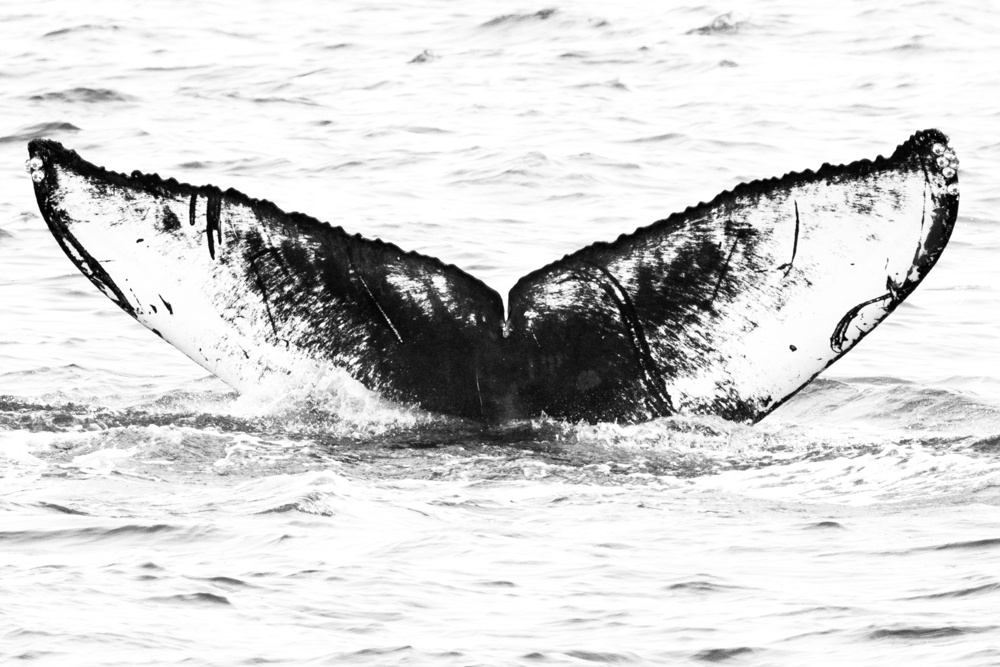

In [97]:
# crop images to tale only
# OR remove text and white space

# file = glob.glob(READ_PATH + '0a8b000b1.jpg')[0]
file = glob.glob(READ_PATH + '001c1ac5f.jpg')[0]
Image.open(file)

In [98]:
pic = Image.open(file)
pix = np.array(pic)
pix
# Image.fromarray(pix)

array([[[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 253, 253],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[246, 246, 246],
        [246, 246, 246],
        [247, 247, 247],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[249, 249, 249],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [200, 200, 200],
        [200, 200, 200],
        [203, 203, 203]],

       [[251, 251, 251],
        [253, 253, 253],
        [252, 252, 252],
        ...,
        [220, 220, 220],
        [222, 222, 222],
        [225, 225, 225]],

       [[253, 253, 253],
        [254, 254, 254],
        [253, 253, 253],
        ...,
        [242, 242, 242],
        [243, 243, 243],
        [244, 244, 244]]

In [101]:
np.sum(pix, axis = 2)/pix.shape[2]

array([[255., 255., 254., ..., 255., 255., 255.],
       [253., 252., 252., ..., 255., 255., 255.],
       [246., 246., 247., ..., 255., 255., 255.],
       ...,
       [249., 251., 251., ..., 200., 200., 203.],
       [251., 253., 252., ..., 220., 222., 225.],
       [253., 254., 253., ..., 242., 243., 244.]])

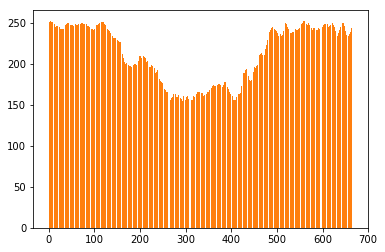

In [102]:
plt.bar(range(pix.shape[0]), np.sum(np.sum(pix, axis = 2)/pix.shape[2], axis = 1)/pix.shape[1])
plt.show()

In [41]:
# find the first row where the whiteness > threshold (200 out of 253)
threshold = 200
np.argmax(np.sum(pix, axis = 1)/pix.shape[1] > threshold)

396

In [96]:
pix[:,:,newaxis].shape

(500, 700, 1)

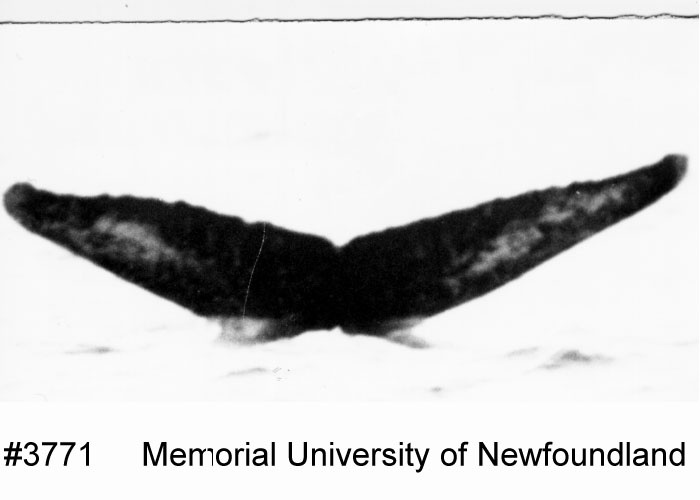

In [34]:
# some images have white background
file2 = glob.glob(READ_PATH + '0ddc00629.jpg')[0]
Image.open(file2)

In [72]:
file2 = glob.glob(READ_PATH + '0ddc00629.jpg')[0]
file2 = glob.glob(READ_PATH + '0a8b000b1.jpg')[0]
pic2 = Image.open(file2)
pix2 = np.array(pic2)
threshold = 245
row_start_whiteness = math.floor(pix2.shape[0]/2)
tmp = np.argmax(np.sum(pix2[row_start_whiteness:, :], axis = 1)/pix2.shape[1] > threshold) + row_start_whiteness

In [13]:
np.array(Image.open(glob.glob(WRITE_PATH + '00bc4dade_crop.jpg')[0])).shape

IndexError: list index out of range

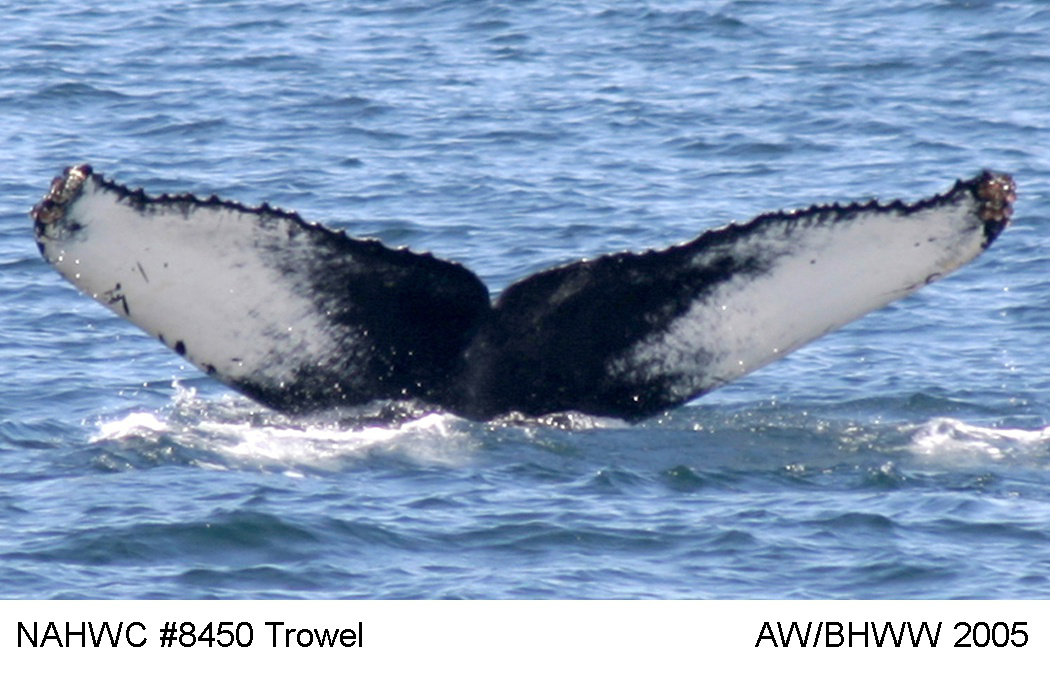

In [12]:
Image.open(glob.glob(READ_PATH + '00bc4dade.jpg')[0])

In [ ]:
# crop text band below images
# First calculate the "whiteness" of each row
# Then find the start of whiteness > THRESHOLD AND in the bottom half of the image
# crop image

In [16]:
THRESHOLD = 245
def remove_text(READ_PATH, WRITE_PATH, filename):
    #     print(i)
    file2 = glob.glob(READ_PATH + filename)[0]
    pic2 = Image.open(file2)
    pix2 = np.array(pic2)
    row_start_whiteness = math.floor(pix2.shape[0]/2)
    
    # determine from which row to remove text band
    if (len(pix2.shape) == 2):
        tmp = np.argmax(np.sum(pix2[row_start_whiteness:, :], axis = 1)/pix2.shape[1] > THRESHOLD) + row_start_whiteness
    elif (len(pix2.shape) == 3):
        tmp = np.argmax(np.sum(np.sum(pix2[row_start_whiteness:, :, :], axis = 2)/pix2.shape[2], axis = 1)/pix2.shape[1] > THRESHOLD) + row_start_whiteness
    
    # crop image
    if (tmp > row_start_whiteness):
        pic2.crop((0, 0, pix2.shape[1], tmp)).save(WRITE_PATH + filename[:-4] + '_crop.jpg')
    else:
        pic2.save(WRITE_PATH + filename)

In [17]:
remove_text(READ_PATH, WRITE_PATH, '00bc4dade.jpg')

In [18]:
for i in tqdm(os.listdir(READ_PATH)):
    remove_text(READ_PATH, WRITE_PATH, i)

100%|██████████████████████████████████████████████████████████████████████████| 25361/25361 [1:12:29<00:00,  4.28it/s]


**Image rescaling analysis**

In [ ]:
# test image read
READ_PATH  = 'C:/Users/KaiPin Liao/Documents/kaggle_whales/data/train_remove_text/'
WRITE_PATH = 'C:/Users/KaiPin Liao/Documents/kaggle_whales/data/train_resized/'

files = glob.glob(READ_PATH + '*')
widths, heights = zip(*[Image.open(f).size for f in files])

In [ ]:
# about 2/3 of files have roughly the same length
x = pd.Series(widths)
print(x.describe())
print(x.quantile(.23))
print(x.quantile(.98))

In [5]:
# less than 40% of files have roughtly the same length
x = pd.Series(heights)
print(x.describe())
print(x.quantile(.30))
print(x.quantile(.98))

count    25361.000000
mean       512.894799
std        156.108327
min         30.000000
25%        400.000000
50%        525.000000
75%        631.000000
max       1575.000000
dtype: float64
436.0
753.7999999999993


In [15]:
# 80/20 solution... let's rescale to (1050,750) so few images lose granularity.
# We'll try adding original scale as suplemental variables later on

# sanity check--do the images look reasonable?
def resize_ten(READ_PATH, WRITE_PATH, new_width, new_height):
    length = len(READ_PATH)
    files = glob.glob(READ_PATH+'*')[:10]
    for f in files:
        out = WRITE_PATH + f[length:]
        Image.open(f).resize(size=(new_width, new_height)).save(out)

resize_ten(READ_PATH, WRITE_PATH, 1050, 750)

In [29]:
NUM_COLORS = 3
NEW_WIDTH = 1050
NEW_HEIGHT = 750

# let's work with one example
file = glob.glob(READ_PATH+'*')[0]
print(file)

t = (np.array(list(Image
    .open(file)
    .resize(size=(NEW_WIDTH, NEW_HEIGHT))
    .getdata()))
    .reshape((NEW_HEIGHT, NEW_WIDTH, NUM_COLORS))
)


print(t[:10])
print(t[:10].shape)


C:/Users/Jared Bauman/Desktop/kaggle/whales/train\0000e88ab.jpg
[[[ 50  77  94]
  [ 54  81  98]
  [ 51  78  95]
  ...
  [ 82 109 139]
  [ 76 103 132]
  [ 63  90 119]]

 [[ 29  56  75]
  [ 31  58  75]
  [ 27  54  73]
  ...
  [ 95 122 152]
  [ 88 115 144]
  [ 73 100 129]]

 [[ 27  54  75]
  [ 30  57  76]
  [ 27  52  74]
  ...
  [ 90 115 145]
  [ 82 107 137]
  [ 66  91 121]]

 ...

 [[ 84 111 140]
  [ 98 125 154]
  [ 98 125 154]
  ...
  [ 51  75 101]
  [ 55  79 107]
  [ 49  73  99]]

 [[ 84 111 140]
  [ 98 125 154]
  [ 98 125 154]
  ...
  [ 51  75 101]
  [ 55  79 107]
  [ 49  73  99]]

 [[ 69  96 125]
  [ 84 111 140]
  [ 91 118 147]
  ...
  [ 62  88 115]
  [ 69  94 124]
  [ 63  89 116]]]
(10, 1050, 3)


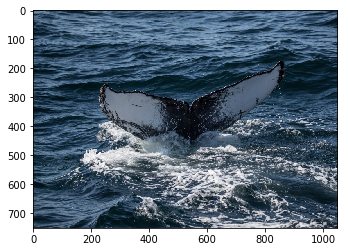

In [28]:
# double check that we've reshaped correctly
plt.imshow(t)